In [12]:
import pandas as pd

# Step 1: Read the CSV file and skip the first column
data = pd.read_csv("Price_data.csv")

# Step 2-6: Iterate over columns, calculate volatility, and store results in a dictionary
volatility_dict = {}
for column in data.columns[1:]:  # Skip the first column
    stock_name = data[column].name
    print(stock_name)

    # Step 2: Calculate the mean of the selected column
    mean_value = data[column].mean()

    # Step 3: Calculate the squared deviations
    deviations = (data[column] - mean_value) ** 2 

    # Step 4: Sum the squared deviations
    sum_squared_deviations = deviations.sum()

    # Step 5: Divide the sum of squared deviations by the total number of data points
    num_data_points = len(data)  # Exclude the first value
    volatility = sum_squared_deviations / num_data_points

    # Step 6: Store the result in the dictionary
    volatility_dict[stock_name + '_volatility'] = volatility

# Step 7: Create a new DataFrame from the dictionary
new_df = pd.DataFrame(list(volatility_dict.items()), columns=['stock', 'volatility'])

print(new_df)


MMM
AOS
ABT
ABBV
ACN
ADBE
AMD
AES
AFL
A
APD
ABNB
AKAM
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
AME
AMGN
APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ACGL
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
AXON
BKR
BALL
BAC
BK
BBWI
BAX
BDX
BRK.B
BBY
BIO
TECH
BIIB
BLK
BX
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF.B
BLDR
BG
CDNS
CZR
CPT
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
COR
CNC
CNP
CF
CHRW
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CPAY
CTVA
CSGP
COST
CTRA
CCI
CSX
CMI
CVS
DHR
DRI
DVA
DAY
DECK
DE
DAL
DVN
DXCM
FANG
DLR
DFS
DG
DLTR
D
DPZ
DOV
DOW
DHI
DTE
DUK
DD
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
LLY
EMR
ENPH
ETR
EOG
EPAM
EQT
EFX
EQIX
EQR
ESS
EL
ETSY
EG
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FICO
FAST
FRT
FDX
FIS
FITB
FSLR
FE
FI
FMC
F
FTNT
FTV
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GEHC
GEV
GEN
GNRC
GD
GIS
GM
GPC
GILD
GPN
GL
GS
HAL
HIG
HAS
HCA
DOC
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
H

In [9]:
data = pd.read_csv("Price_data.csv")
print(type(data[column][0]))
print(data[column].head)

<class 'numpy.float64'>
<bound method NDFrame.head of 0       179.385
1       179.940
2       179.610
3       178.960
4       178.590
         ...   
7831     96.370
7832     96.090
7833     96.060
7834     95.715
7835     95.550
Name: MMM, Length: 7836, dtype: float64>


In [13]:
file_path = r"C:\Users\naysa\OneDrive\Documents\171-project\standardvolatility.csv"

# Save new_df to a CSV file
new_df.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

In [14]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file and skip the first column
data = pd.read_csv("Price_data.csv")

# Step 2-6: Iterate over columns, calculate historical volatility, and store results in a dictionary
historical_volatility_dict = {}
for column in data.columns[1:]:  # Skip the first column
    # Extract the stock name
    stock_name = data[column].name

    # Calculate the natural logarithm of each data point
    logs = np.log(data[column].astype(float))

    # Calculate the difference between consecutive logarithms
    log_diffs = logs.diff()

    # Sum up the squared differences of log differences
    sum_log_diffs = (log_diffs).sum()

    # Store the result in the dictionary
    historical_volatility_dict[stock_name + '_historical_volatility'] = sum_squared_log_diffs

historical_volatility_df = pd.DataFrame(list(historical_volatility_dict.items()), columns=['stock', 'historical_volatility'])

print(historical_volatility_df)


                          stock  historical_volatility
0     MMM_historical_volatility              -0.629885
1     AOS_historical_volatility               0.509555
2     ABT_historical_volatility               0.315151
3    ABBV_historical_volatility               0.733108
4     ACN_historical_volatility               0.581249
..                          ...                    ...
498   XYL_historical_volatility               0.575777
499   YUM_historical_volatility               0.288075
500  ZBRA_historical_volatility               0.468689
501   ZBH_historical_volatility              -0.018397
502   ZTS_historical_volatility               0.506236

[503 rows x 2 columns]


In [15]:
file_path = r"C:\Users\naysa\OneDrive\Documents\171-project\historicalvolatility.csv"

# Save new_df to a CSV file
historical_volatility_df.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

In [3]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file and skip the first column
data = pd.read_csv("Price_data.csv")

# Step 2: Initialize an empty DataFrame to store historical volatility
historical_volatility_df = pd.DataFrame()

# Step 3: Iterate over columns and calculate historical volatility for each stock
for column in data.columns[1:]:  # Skip the first column
    # Extract the stock name from the first value in the column
    stock_name = data[column].name

    # Calculate the natural logarithm of each data point
    logs = np.log(data[column].astype(float))  # Exclude the first value for calculation

    # Calculate the difference between consecutive logarithms
    log_diffs = logs.diff()

    # Add the differences as a new column in the historical_volatility_df DataFrame
    historical_volatility_df[stock_name] = log_diffs

historical_volatility_df = historical_volatility_df.iloc[1:]

print(historical_volatility_df)


C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  historical_volatility_df[stock_name] = log_diffs
C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  historical_volatility_df[stock_name] = log_diffs
C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

           MMM       AOS       ABT      ABBV       ACN      ADBE       AMD  \
1     0.003089 -0.002934 -0.006930 -0.003401 -0.001555 -0.003536 -0.002599   
2    -0.001836  0.003032 -0.001626  0.002696  0.000922  0.000560 -0.006341   
3    -0.003626 -0.003423 -0.002934 -0.003403 -0.002999 -0.003130 -0.014701   
4    -0.002070  0.003814  0.000979 -0.000386  0.000116 -0.001850  0.000190   
5     0.003438  0.003021  0.002996  0.002955  0.004351  0.005611  0.010950   
...        ...       ...       ...       ...       ...       ...       ...   
7831 -0.004039  0.004098 -0.000849 -0.001076  0.000513 -0.002453 -0.003128   
7832 -0.002910  0.000350  0.000142 -0.001847 -0.003983  0.001999 -0.005546   
7833 -0.000312  0.000584  0.000802  0.001232 -0.001449 -0.003668 -0.006612   
7834 -0.003598 -0.002162  0.000377 -0.002804  0.001385  0.000769 -0.002462   
7835 -0.001725 -0.002988  0.000754  0.002835  0.000225 -0.004338  0.001686   

           AES       AFL         A  ...       WMB       WTW    

C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  historical_volatility_df[stock_name] = log_diffs
C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  historical_volatility_df[stock_name] = log_diffs
C:\Users\naysa\AppData\Local\Temp\ipykernel_23540\1062534282.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [18]:
file_path = r"C:\Users\naysa\OneDrive\Documents\171-project\historicalvolatility.csv"

# Save new_df to a CSV file
historical_volatility_df.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

Below is a model trained with no sort of parameter training whatsoever.

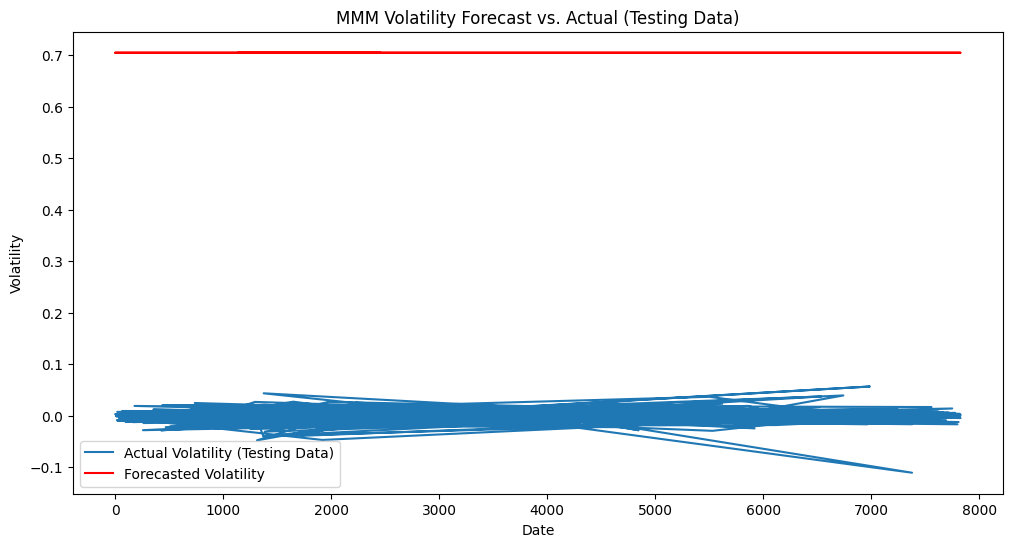

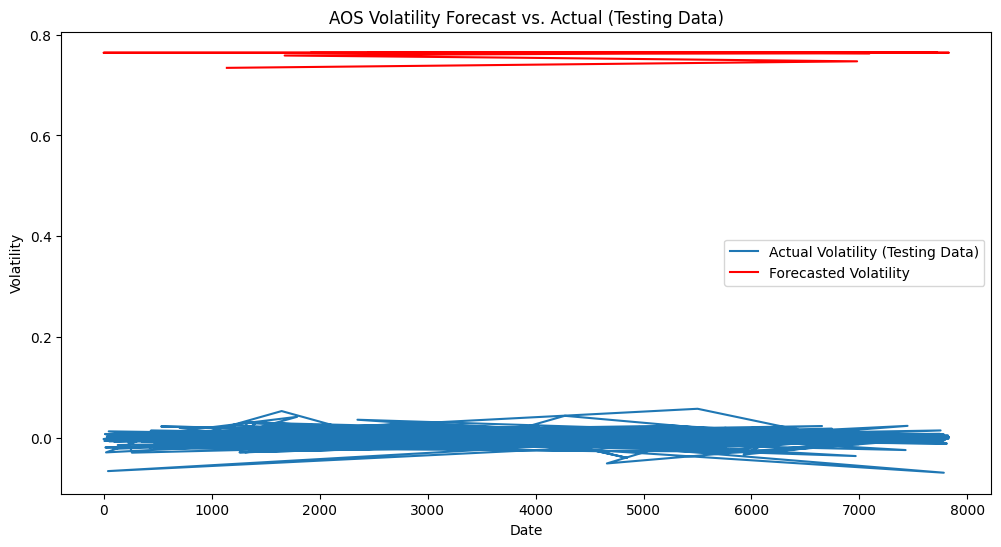

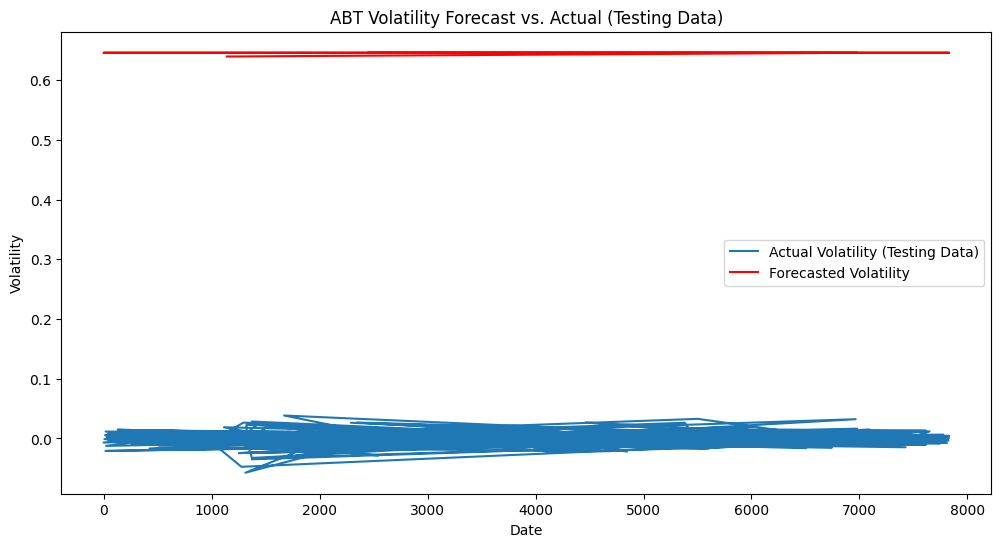

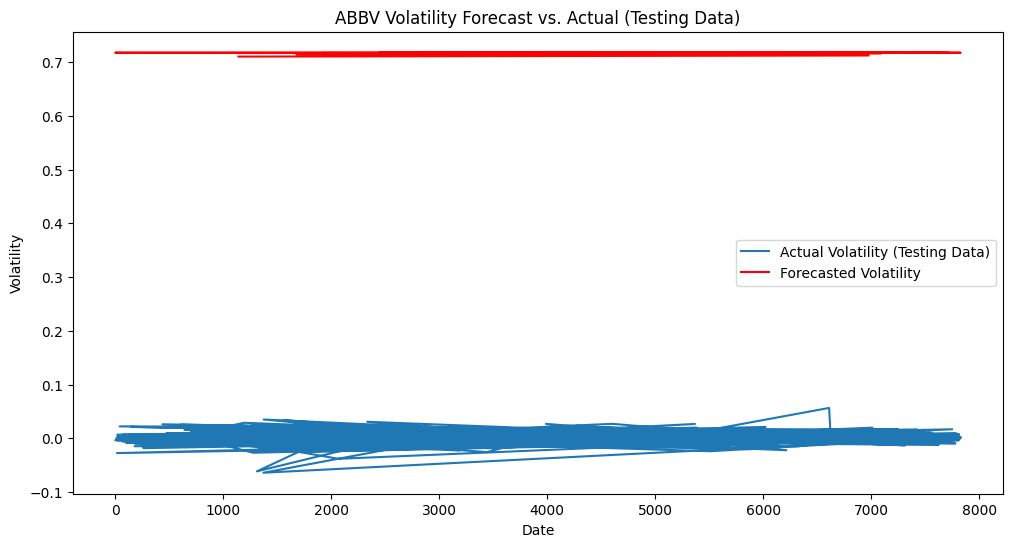

c:\Python310\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


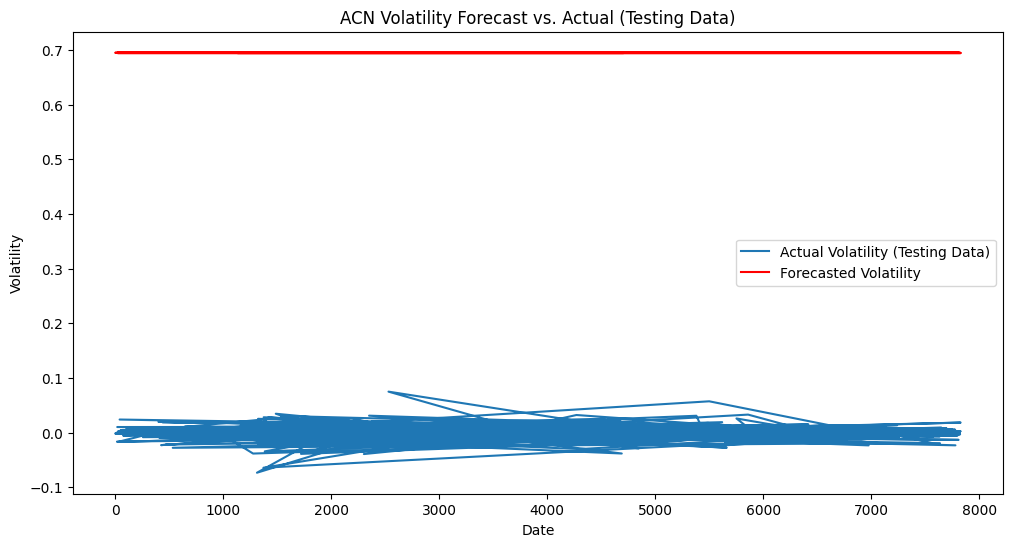

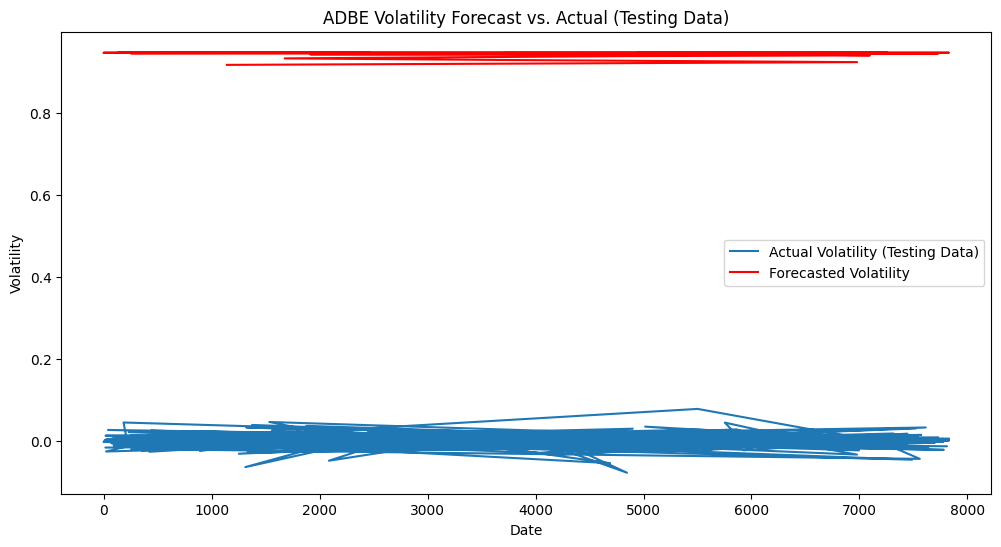

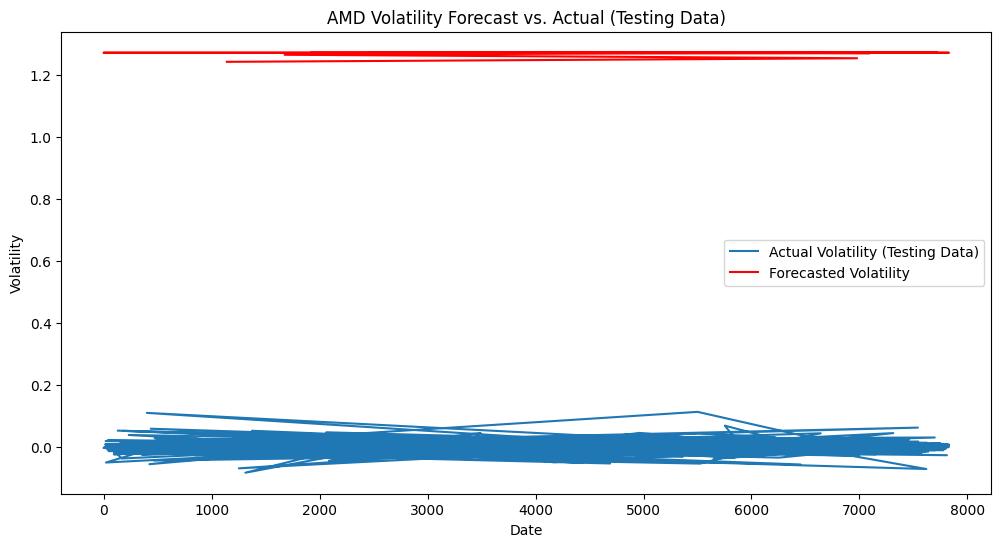

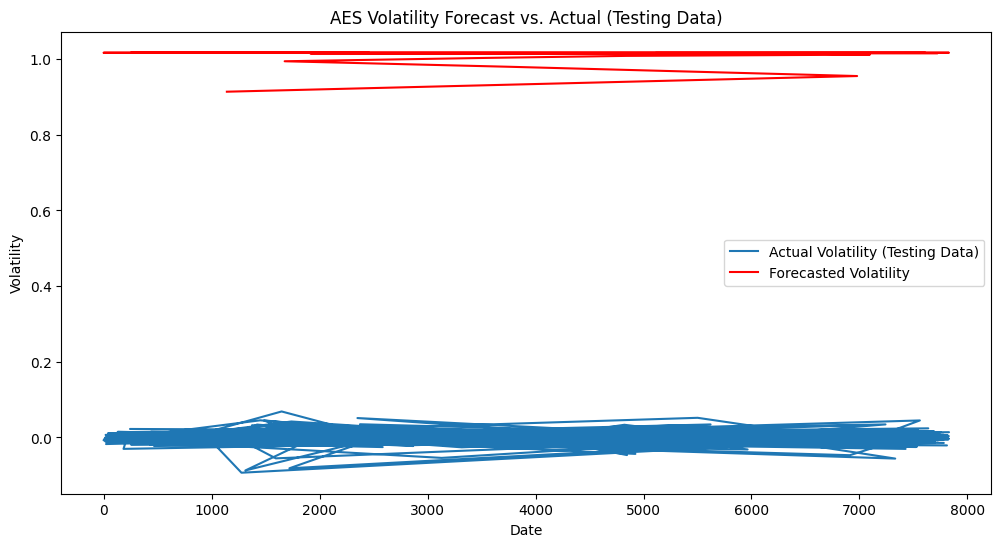

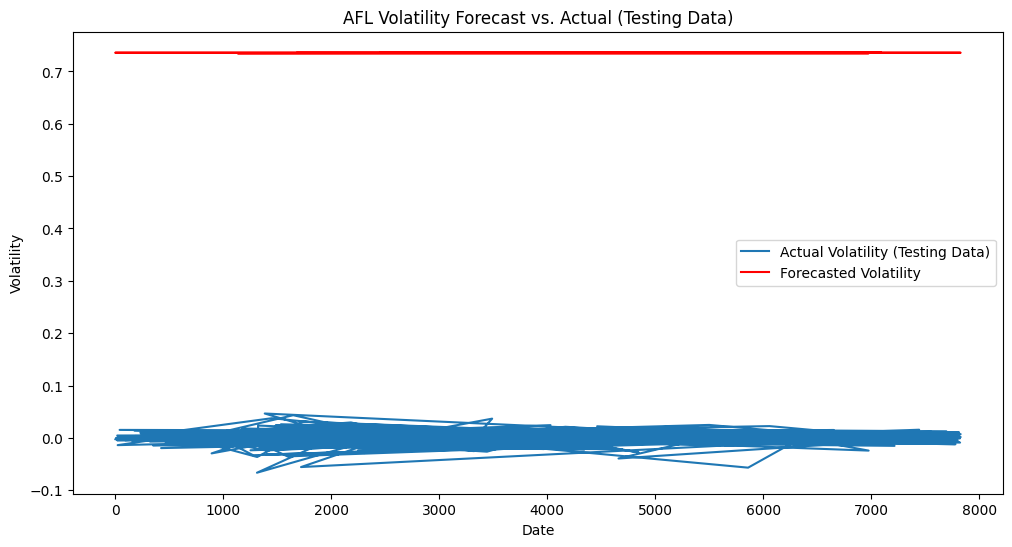

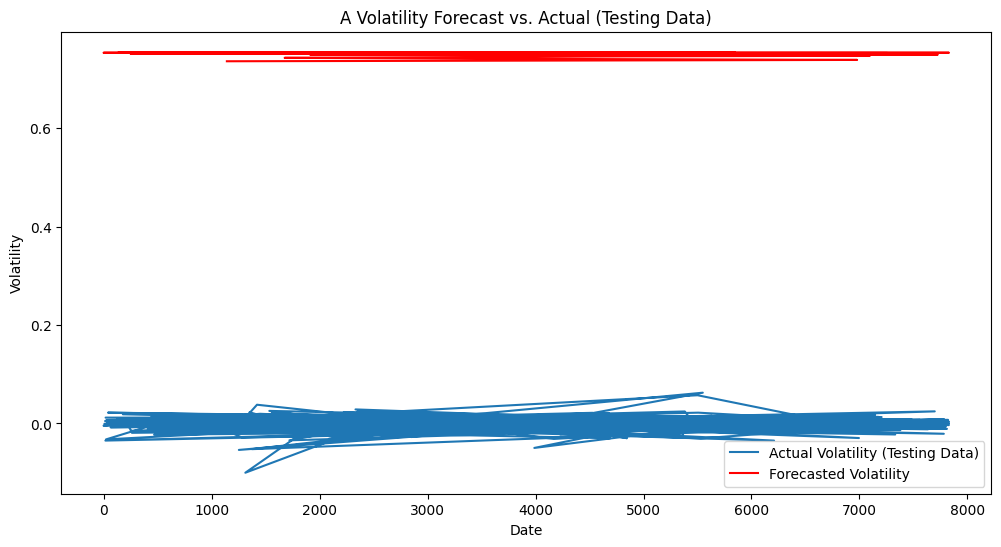

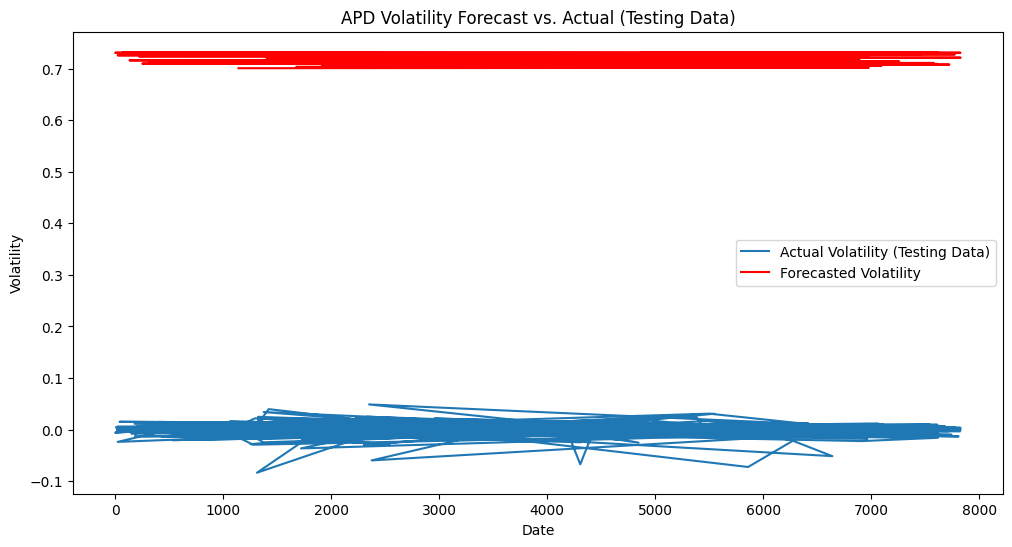

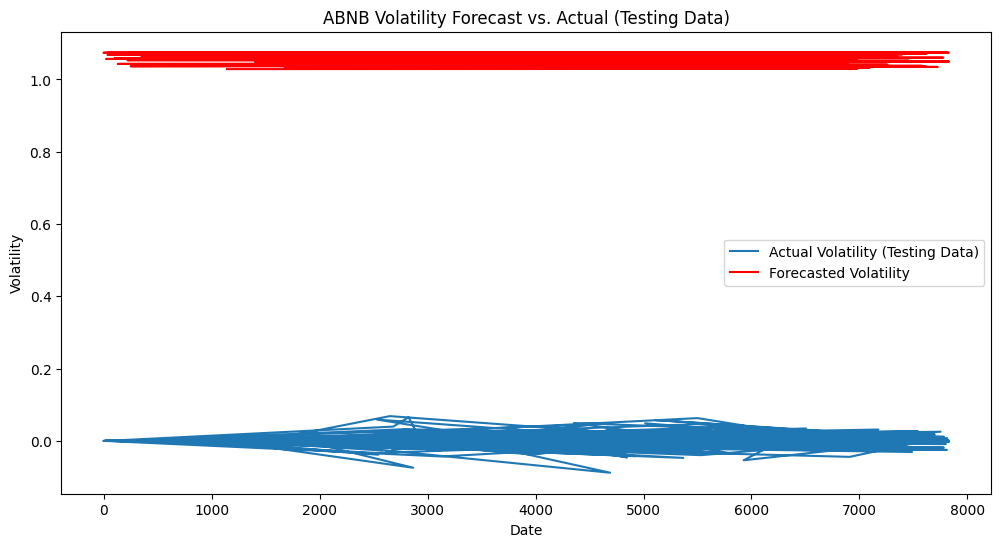

KeyboardInterrupt: 

In [6]:
import pandas as pd
import numpy as np
import arch
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split



# Each column represents a stock, and each row represents hourly volatility

# Initialize an empty DataFrame to store model parameters
historical_volatility_df = pd.read_csv('historicalvolatility.csv')
model_params = pd.DataFrame(index=historical_volatility_df.columns, columns=['mu','omega', 'alpha', 'beta', 'gamma'])

historical_volatility_df.fillna(historical_volatility_df.mean(), inplace=True)

train_data, test_data = train_test_split(historical_volatility_df, test_size=0.2, random_state=42)


# Loop through each stock
for stock in historical_volatility_df.columns:
    # Extract volatility data for the current stock
    # stock_volatility = historical_volatility_df[stock]
    train_stock_volatility = train_data[stock]
    test_stock_volatility = test_data[stock]
    train_rescaled_y = 100 * train_stock_volatility
    test_rescaled_y = 100 * test_stock_volatility
    
    # Fit GJR-GARCH(1,1) model
    model = arch.arch_model(train_rescaled_y, vol='GARCH', p=1, o=1, q=1)
    result = model.fit(disp="off")
    
    # Store model parameters
    model_params.loc[stock] = [result.params['mu'], result.params['omega'], result.params['alpha[1]'], result.params['beta[1]'], result.params['gamma[1]']]
    residuals = result.resid / result.conditional_volatility

    forecast_horizon = len(test_stock_volatility)
    forecast = result.forecast(horizon=forecast_horizon)
    
    # Extract forecasts
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1])

    
    # Plot the forecasted volatility with the actual volatility for testing data
    plt.figure(figsize=(12, 6))
    plt.plot(test_stock_volatility.index, test_stock_volatility, label='Actual Volatility (Testing Data)')
    plt.plot(test_stock_volatility.index, forecast_volatility, label='Forecasted Volatility', color='red')
    
    plt.title(f'{stock} Volatility Forecast vs. Actual (Testing Data)')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()
    
    # Plot ACF and PACF of residuals
    # ACF plot
    '''
    plt.subplot(121)
    plot_acf(residuals, lags=40, zero=False, ax=plt.gca())
    plt.title(f'{stock_name} ACF of Standardized Residuals')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation Coefficient')
    plt.ylim(-0.2, 0.2)

    # PACF plot
    plt.subplot(122)
    plot_pacf(residuals, lags=40, zero=False, ax=plt.gca())
    plt.title(f'{stock_name} PACF of Standardized Residuals')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation Coefficient')
    plt.ylim(-0.2, 0.2)

    plt.tight_layout()
    plt.show()
    '''

    #plt.figure(figsize=(10, 5))
    #plt.subplot(121)
    #plot_acf(residuals, ax=plt.gca())
    #plt.title(f'{stock} ACF of Standardized Residuals')
    #plt.subplot(122)
    #plot_pacf(residuals, ax=plt.gca())
    #plt.title(f'{stock} PACF of Standardized Residuals')
    #plt.tight_layout()
    #plt.show()

# Print model parameters
print(model_params)


In [9]:
print(model_params)

            mu     omega     alpha      beta     gamma
MMM  -0.009551  0.001852   0.00768  0.990618 -0.003368
AOS   0.013293  0.014651  0.010292  0.935435  0.064998
ABT   0.005164  0.008013  0.024384  0.951542  0.005631
ABBV  0.007801  0.013554  0.016699  0.939399  0.035929
ACN   0.018701  0.002433  0.000613  0.971492  0.048411
...        ...       ...       ...       ...       ...
XYL   0.012022  0.005402  0.014776  0.961333  0.031672
YUM   0.003932  0.004564  0.007445  0.961965  0.033901
ZBRA  0.004965  0.019786  0.004412  0.970738  0.011667
ZBH   0.003094  0.003397  0.001252  0.979093  0.027568
ZTS    0.01575  0.010755  0.002183  0.939296  0.076614

[503 rows x 5 columns]


In [9]:
file_path = r"C:\Users\naysa\OneDrive\Documents\171-project\rescaledmodelparams.csv"

# Save new_df to a CSV file
model_params.to_csv(file_path)  # Set index=False to exclude row indices in the CSV

Omega (ω): This parameter represents the constant term in the GARCH model. It is the variance of the innovation process, which is the component of volatility not explained by past shocks. Omega captures the long-term volatility of the series. A small 𝜔 means that the baseline volatility, or the volatility not explained by past shocks, is relatively low. In other words, it suggests that the series tends to have low volatility in the absence of external shocks or information.

Alpha (α): Alpha is the coefficient associated with the lagged squared (squared residual) terms in the GARCH equation. It measures the impact of the previous period's squared error on the current period's volatility. It captures the short-term volatility clustering effect, meaning that large price movements tend to be followed by more large price movements. With a small α, past squared shocks have less influence on current volatility, leading to a faster decay in the impact of past shocks. This implies that the model believes volatility returns to its long-term average relatively quickly after experiencing shocks

Beta (β): Beta is the coefficient associated with the lagged conditional variance (squared volatility) terms in the GARCH equation. It measures the persistence of volatility shocks. A higher value of beta implies a slower decay in the effect of past shocks on current volatility, indicating a more persistent volatility.

Gamma (γ): Gamma is the coefficient associated with the lagged squared residuals in the GJR-GARCH model, which allows for asymmetric effects of positive and negative shocks. It captures the leverage effect, where negative shocks have a greater impact on volatility than positive shocks of the same magnitude.

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load historical volatility data
data = pd.read_csv('historicalvolatility.csv')
volatility_data = data.to_numpy()

# Use the first stock
train_data = volatility_data[:, 0]
true_volatility = train_data

test_size = 0.2  # 20% of the data for testing
n_test = int(len(train_data) * test_size)
test_data = train_data[-n_test:]
train_data = train_data[:-n_test]

# Define the GJR-GARCH(1,1) Model
class GJRGARCHModel(tf.keras.Model):
    def __init__(self):
        super(GJRGARCHModel, self).__init__()
        # Initialize model parameters
        self.omega = tf.Variable(1, dtype=tf.float32, trainable=True, name='omega')
        self.alpha = tf.Variable(0.01, dtype=tf.float32, trainable=True, name='alpha')
        self.gamma = tf.Variable(0.01, dtype=tf.float32, trainable=True, name='gamma')
        self.beta = tf.Variable(0.01, dtype=tf.float32, trainable=True, name='beta')

        self.trainable_variables_list = [self.omega, self.alpha, self.gamma, self.beta]

    def call(self, vol_data):
        T = len(vol_data)
        h = tf.TensorArray(dtype=tf.float32, size=T)
        h = h.write(0, np.var(vol_data))  # Initial variance as the mean volatility

        for t in range(1, T):
            lag_vol = vol_data[t-1]
            lag_h = h.read(t-1)
            leverage_term = self.gamma * lag_vol if lag_vol < 0 else 0
            #print(f"Step {t}: lag_vol={lag_vol}, lag_h={lag_h}, leverage_term={leverage_term}")

            h_t = self.omega + self.alpha * lag_vol**2 + leverage_term + self.beta * lag_h
            h = h.write(t, h_t)
        
        h = h.stack()
        return h

# Define loss function (MSE)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Initialize GJR-GARCH model
gjr_garch_model = GJRGARCHModel()

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


# k-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k)

epochs_per_fold = 50
best_val_loss = float('inf')

for fold, (train_index, val_index) in enumerate(kf.split(train_data)):
    print(f"Training fold {fold + 1}/{k}")
    
    x_train, x_val = train_data[train_index], train_data[val_index]
    
    gjr_garch_model = GJRGARCHModel()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Re-initialize optimizer


    for epoch in range(epochs_per_fold):
        with tf.GradientTape() as tape:
            # Forward pass: compute predicted volatility
            predicted_volatility = gjr_garch_model(x_train)
            
            # Debugging: Print intermediate values
            if epoch == 0:
                print("Initial omega:", gjr_garch_model.omega.numpy())
                print("Initial alpha:", gjr_garch_model.alpha.numpy())
                print("Initial gamma:", gjr_garch_model.gamma.numpy())
                print("Initial beta:", gjr_garch_model.beta.numpy())
                print("Predicted volatility at first step:", predicted_volatility[:5].numpy())
            
            # Compute the loss
            loss = loss_fn(x_train, predicted_volatility)
        
        # Backpropagation: compute gradients and update model parameters
        # print(gjr_garch_model.trainable_variables_list)
        gradients = tape.gradient(loss, gjr_garch_model.trainable_variables_list)
        
        # Debugging: Check if gradients are None
        for i, grad in enumerate(gradients):
            if grad is None:
                print(f"Gradient {i} is None at epoch {epoch}")
        # print(gjr_garch_model.trainable_variables_list)
        
        optimizer.apply_gradients(zip(gradients, gjr_garch_model.trainable_variables_list))
        
        if epoch % 10 == 0:
            print(f'Fold {fold + 1}, Epoch {epoch}, Loss: {loss.numpy()}')
            print("Predicted volatility at this step:", predicted_volatility[:5].numpy())
            print("new omega:", gjr_garch_model.omega.numpy())
            print("new alpha:", gjr_garch_model.alpha.numpy())
            print("new gamma:", gjr_garch_model.gamma.numpy())
            print("new beta:", gjr_garch_model.beta.numpy())
            for grad in gradients:
                print(grad.numpy())
        
    val_pred_volatility = gjr_garch_model(x_val)
    val_loss = loss_fn(x_val, val_pred_volatility)
    print(f'Fold {fold + 1}, Validation Loss: {val_loss.numpy()}')

    if val_loss.numpy() < best_val_loss:
        best_val_loss = val_loss.numpy()
        best_parameters = [gjr_garch_model.omega.numpy(), 
                            gjr_garch_model.alpha.numpy(), 
                            gjr_garch_model.gamma.numpy(), 
                            gjr_garch_model.beta.numpy()]


Training fold 1/5
Initial omega: 1.0
Initial alpha: 0.01
Initial gamma: 0.01
Initial beta: 0.01
Predicted volatility at first step: [0. 0. 0. 0. 0.]
Fold 1, Epoch 0, Loss: 0.0002524103329051286
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.9900773
new alpha: 0.009991069
new gamma: 0.010014607
new beta: 7.653609e-05
0.00040627221
2.826632e-09
-4.6258735e-09
0.00041037126
Fold 1, Epoch 10, Loss: 0.00018606115190777928
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.8918517
new alpha: 0.009786718
new gamma: 0.009279527
new beta: -0.09700728
0.00030332748
2.2603597e-09
3.000386e-08
0.00025140913
Fold 1, Epoch 20, Loss: 0.00014338248001877218
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.799348
new alpha: 0.009501221
new gamma: 0.005662461
new beta: -0.1838772
0.0002325915
1.7079216e-09
5.372356e-08
0.00015987769
Fold 1, Epoch 30, Loss: 0.00011605819599935785
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.71542543
new 

Initial omega: 0.5802877
Initial alpha: 0.0073555857
Initial gamma: 0.00902064
Initial beta: -0.35543364
Predicted volatility at first step: [0. 0. 0. 0. 0.]
Final Training Epoch 0, Loss: 7.565059786429629e-05
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.5802877
new alpha: 0.0073555857
new gamma: 0.00902064
new beta: -0.35543364
0.0001004038
1.8484426e-10
8.763363e-08
4.3013464e-05
Final Training Epoch 10, Loss: 6.41787119093351e-05
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.5802877
new alpha: 0.0073555857
new gamma: 0.00902064
new beta: -0.35543364
7.301359e-05
-4.869328e-10
1.17158e-07
2.4366891e-05
Final Training Epoch 20, Loss: 5.689320096280426e-05
Predicted volatility at this step: [0. 0. 0. 0. 0.]
new omega: 0.5802877
new alpha: 0.0073555857
new gamma: 0.00902064
new beta: -0.35543364
5.2786087e-05
-1.0480412e-09
1.3877953e-07
1.3516201e-05
Final Training Epoch 30, Loss: 5.252298797131516e-05
Predicted volatility at this step: [0. 0. 0. 

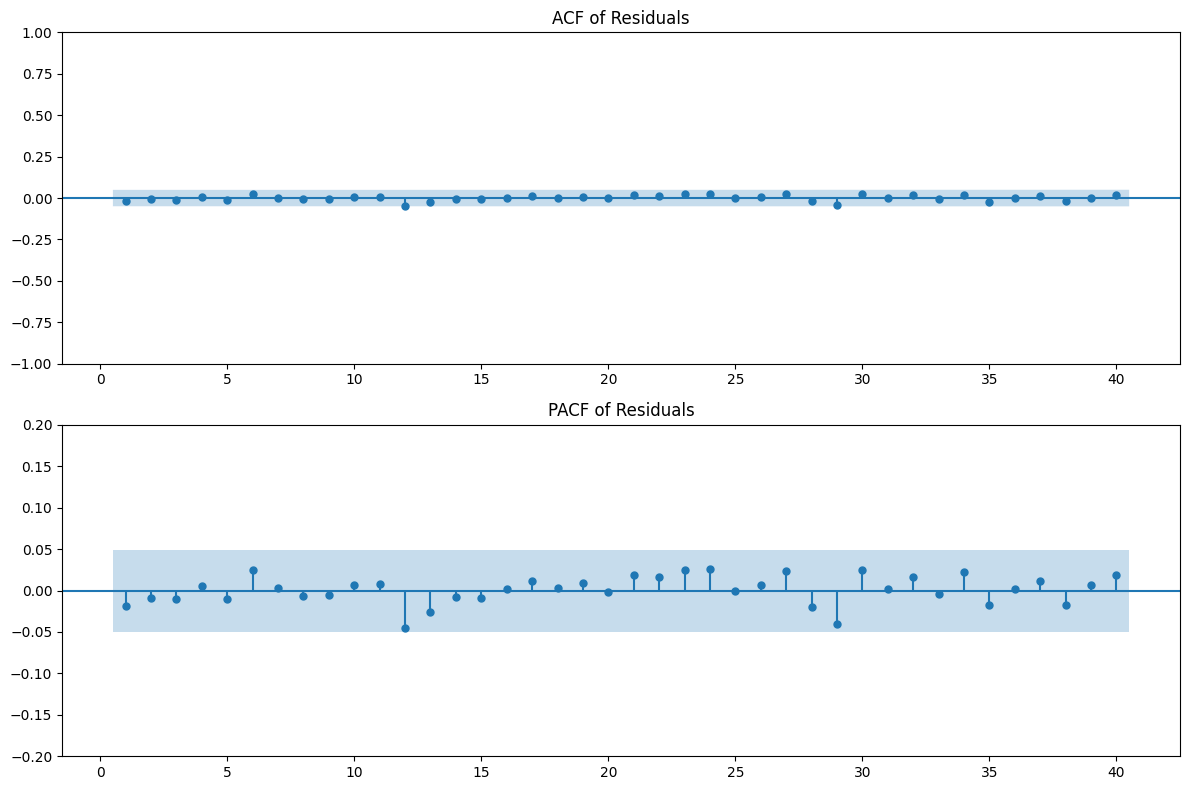

In [45]:

# Final model training on entire training data with best parameters
final_gjr_garch_model = GJRGARCHModel()
final_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Re-initialize optimizer

# Set the best parameters found during cross-validation
final_gjr_garch_model.omega.assign(best_parameters[0])
final_gjr_garch_model.alpha.assign(best_parameters[1])
final_gjr_garch_model.gamma.assign(best_parameters[2])
final_gjr_garch_model.beta.assign(best_parameters[3])

for epoch in range(epochs_per_fold):
    with tf.GradientTape() as tape:
        predicted_volatility = final_gjr_garch_model(train_data)
        if epoch == 0:
                print("Initial omega:", gjr_garch_model.omega.numpy())
                print("Initial alpha:", gjr_garch_model.alpha.numpy())
                print("Initial gamma:", gjr_garch_model.gamma.numpy())
                print("Initial beta:", gjr_garch_model.beta.numpy())
                print("Predicted volatility at first step:", predicted_volatility[:5].numpy())
        loss = loss_fn(train_data, predicted_volatility)
    
    gradients = tape.gradient(loss, final_gjr_garch_model.trainable_variables_list)
    final_optimizer.apply_gradients(zip(gradients, final_gjr_garch_model.trainable_variables_list))
    
    if epoch % 10 == 0:
        print(f'Final Training Epoch {epoch}, Loss: {loss.numpy()}')
        print("Predicted volatility at this step:", predicted_volatility[:5].numpy())
        print("new omega:", gjr_garch_model.omega.numpy())
        print("new alpha:", gjr_garch_model.alpha.numpy())
        print("new gamma:", gjr_garch_model.gamma.numpy())
        print("new beta:", gjr_garch_model.beta.numpy())
        for grad in gradients:
            print(grad.numpy())

# Evaluate the final model on the test data
test_pred_volatility = final_gjr_garch_model(test_data)
print(test_pred_volatility)
test_loss = loss_fn(test_data, test_pred_volatility)
print(f'Test Loss: {test_loss.numpy()}')

# Generate residuals
residuals = test_data - test_pred_volatility.numpy()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, lags=40, zero=False, ax=ax[0])
ax[0].set_title('ACF of Residuals')
plt.ylim(-0.2, 0.2)

plot_pacf(residuals, zero=False, lags=40, ax=ax[1])
ax[1].set_title('PACF of Residuals')
plt.ylim(-0.2, 0.2)

plt.tight_layout()
plt.show()

ACF and PACF of residuals is supposed to look like white noise.

In [48]:
print(test_pred_volatility.numpy()[:-1])


[0. 0. 0. ... 0. 0. 0.]


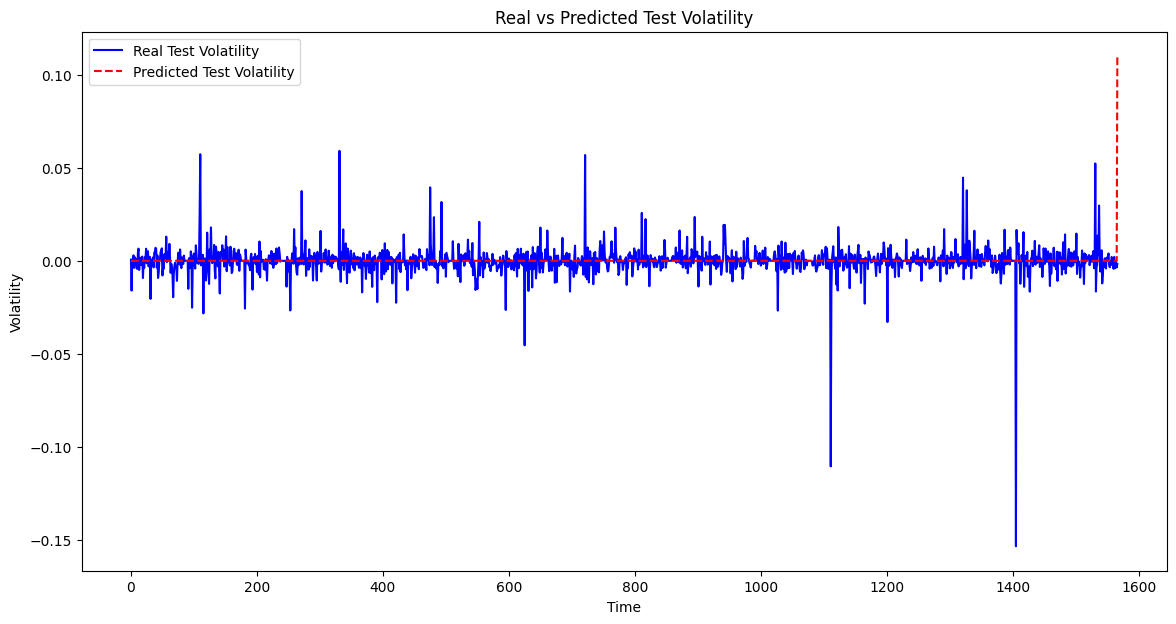

In [49]:
# Plot real vs predicted test volatility
plt.figure(figsize=(14, 7))
plt.plot(test_data, label='Real Test Volatility', color='blue')
plt.plot(test_pred_volatility.numpy(), label='Predicted Test Volatility', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Real vs Predicted Test Volatility')
plt.legend()
plt.show()